# Q1

## (a)

First there are $(n-l+1)$ of possible positions of the l-mer match on the database. Moreover, there are $(m-l+1)$ possible positions of the l-mer match on the query string, and then we calculate the probability of l-mer match of nucleotides appearing, which is $\frac{1}{4}^l$, so the expression for the expected number of l-mer matches between a query sequence and a database substring is: $$(n-l+1)(m-l+1)(\frac{1}{4})^l$$

As $m$ goes from a very large number to $l$, the $(m-l+1)$ will get smaller. The formula will become: $$(n-l+1)(\frac{1}{4})^l$$ 
when $m = l$

In [5]:
#example: m goes down from 10000 to l, which is 10
n = 100000
m = [10000, 1000, 100, 10]
l = 10

matches = [(n-l+1)*(m[i]-l+1)*(1/4)**l for i in range(4)]
print(matches)
print((n-l+1)*(1/4)**l)

[952.7302560806274, 94.50061893463135, 8.677655220031738, 0.09535884857177734]
0.09535884857177734


We can see that as m goes down, the expected matches gets smaller, and when m=l, we see that the value calculated by the first formula is equal to the value calculated by the second formula.

## (b)

First we consider the expected matches for a single query, in which we just have to change $m$ to $r$, and then we have $\frac{m}{r}$ number of queries, so the new formula for the expected matches is: $$\frac{m}{r}(n-l+1)(r-l+1)(\frac{1}{4})^l$$

## (c)

Since all nucleotides are not equally likely, we have to consider different possibility for each kind of matches, sum them up, and times by total possible positions which is $n-5+1 = n-4$

In [2]:
#Computation
!python q1c.py

0.013650000000000006(n-4)


By a little change, we get the expected matches as: $$0.66325n - 2.653$$

# Q2

Using the formula from class about $T(l,m,n)$ and the formula calculated in q1b, we are able to get this formula for speedup: $\frac{mn}{m+n+r^2(\frac{m}{r}(r-l+1)(n-l+1)\frac{1}{4}^l)}$, which could be further altered to $$\frac{mn}{m+n+rm(r-l+1)(n-l+1)\frac{1}{4}^l}$$

The sensitivity formula for one query string according to the lecture is: $$1-(1-(1-\epsilon )^l)^{r-l+1}$$

In which $(1-\epsilon )^l)^{r-l+1}$ represents the probability for not having the 85% identity match. When we raise it by the total number of queries, we get the probability for not having the 85% identity match in all queries, then we use 1 to minus it to get the probability of reads has an exact l-mer match or more. The formula is turned to: $$1-((1-(1-\epsilon )^l)^{r-l+1})^{\frac{m}{r}}$$
or $$1-(1-(0.85)^l)^{\frac{m}{r}(r-l+1)}$$

In [3]:
#Compute the speedup and sensitivity and put them into a txt file
!python q2.py

    l       Speedup  Sensitivity
0   5  1.066667e-01          1.0
1  11  4.659908e+02          1.0
2  15  1.218121e+05          1.0
3  20  4.822371e+06          1.0
4  25  4.999831e+06          1.0
5  30  5.000000e+06          1.0
6  35  5.000000e+06          1.0
7  40  5.000000e+06          1.0


# Q3

In the automaton, the black arrow lines with letters are edges, blue arrow lines are failure links.

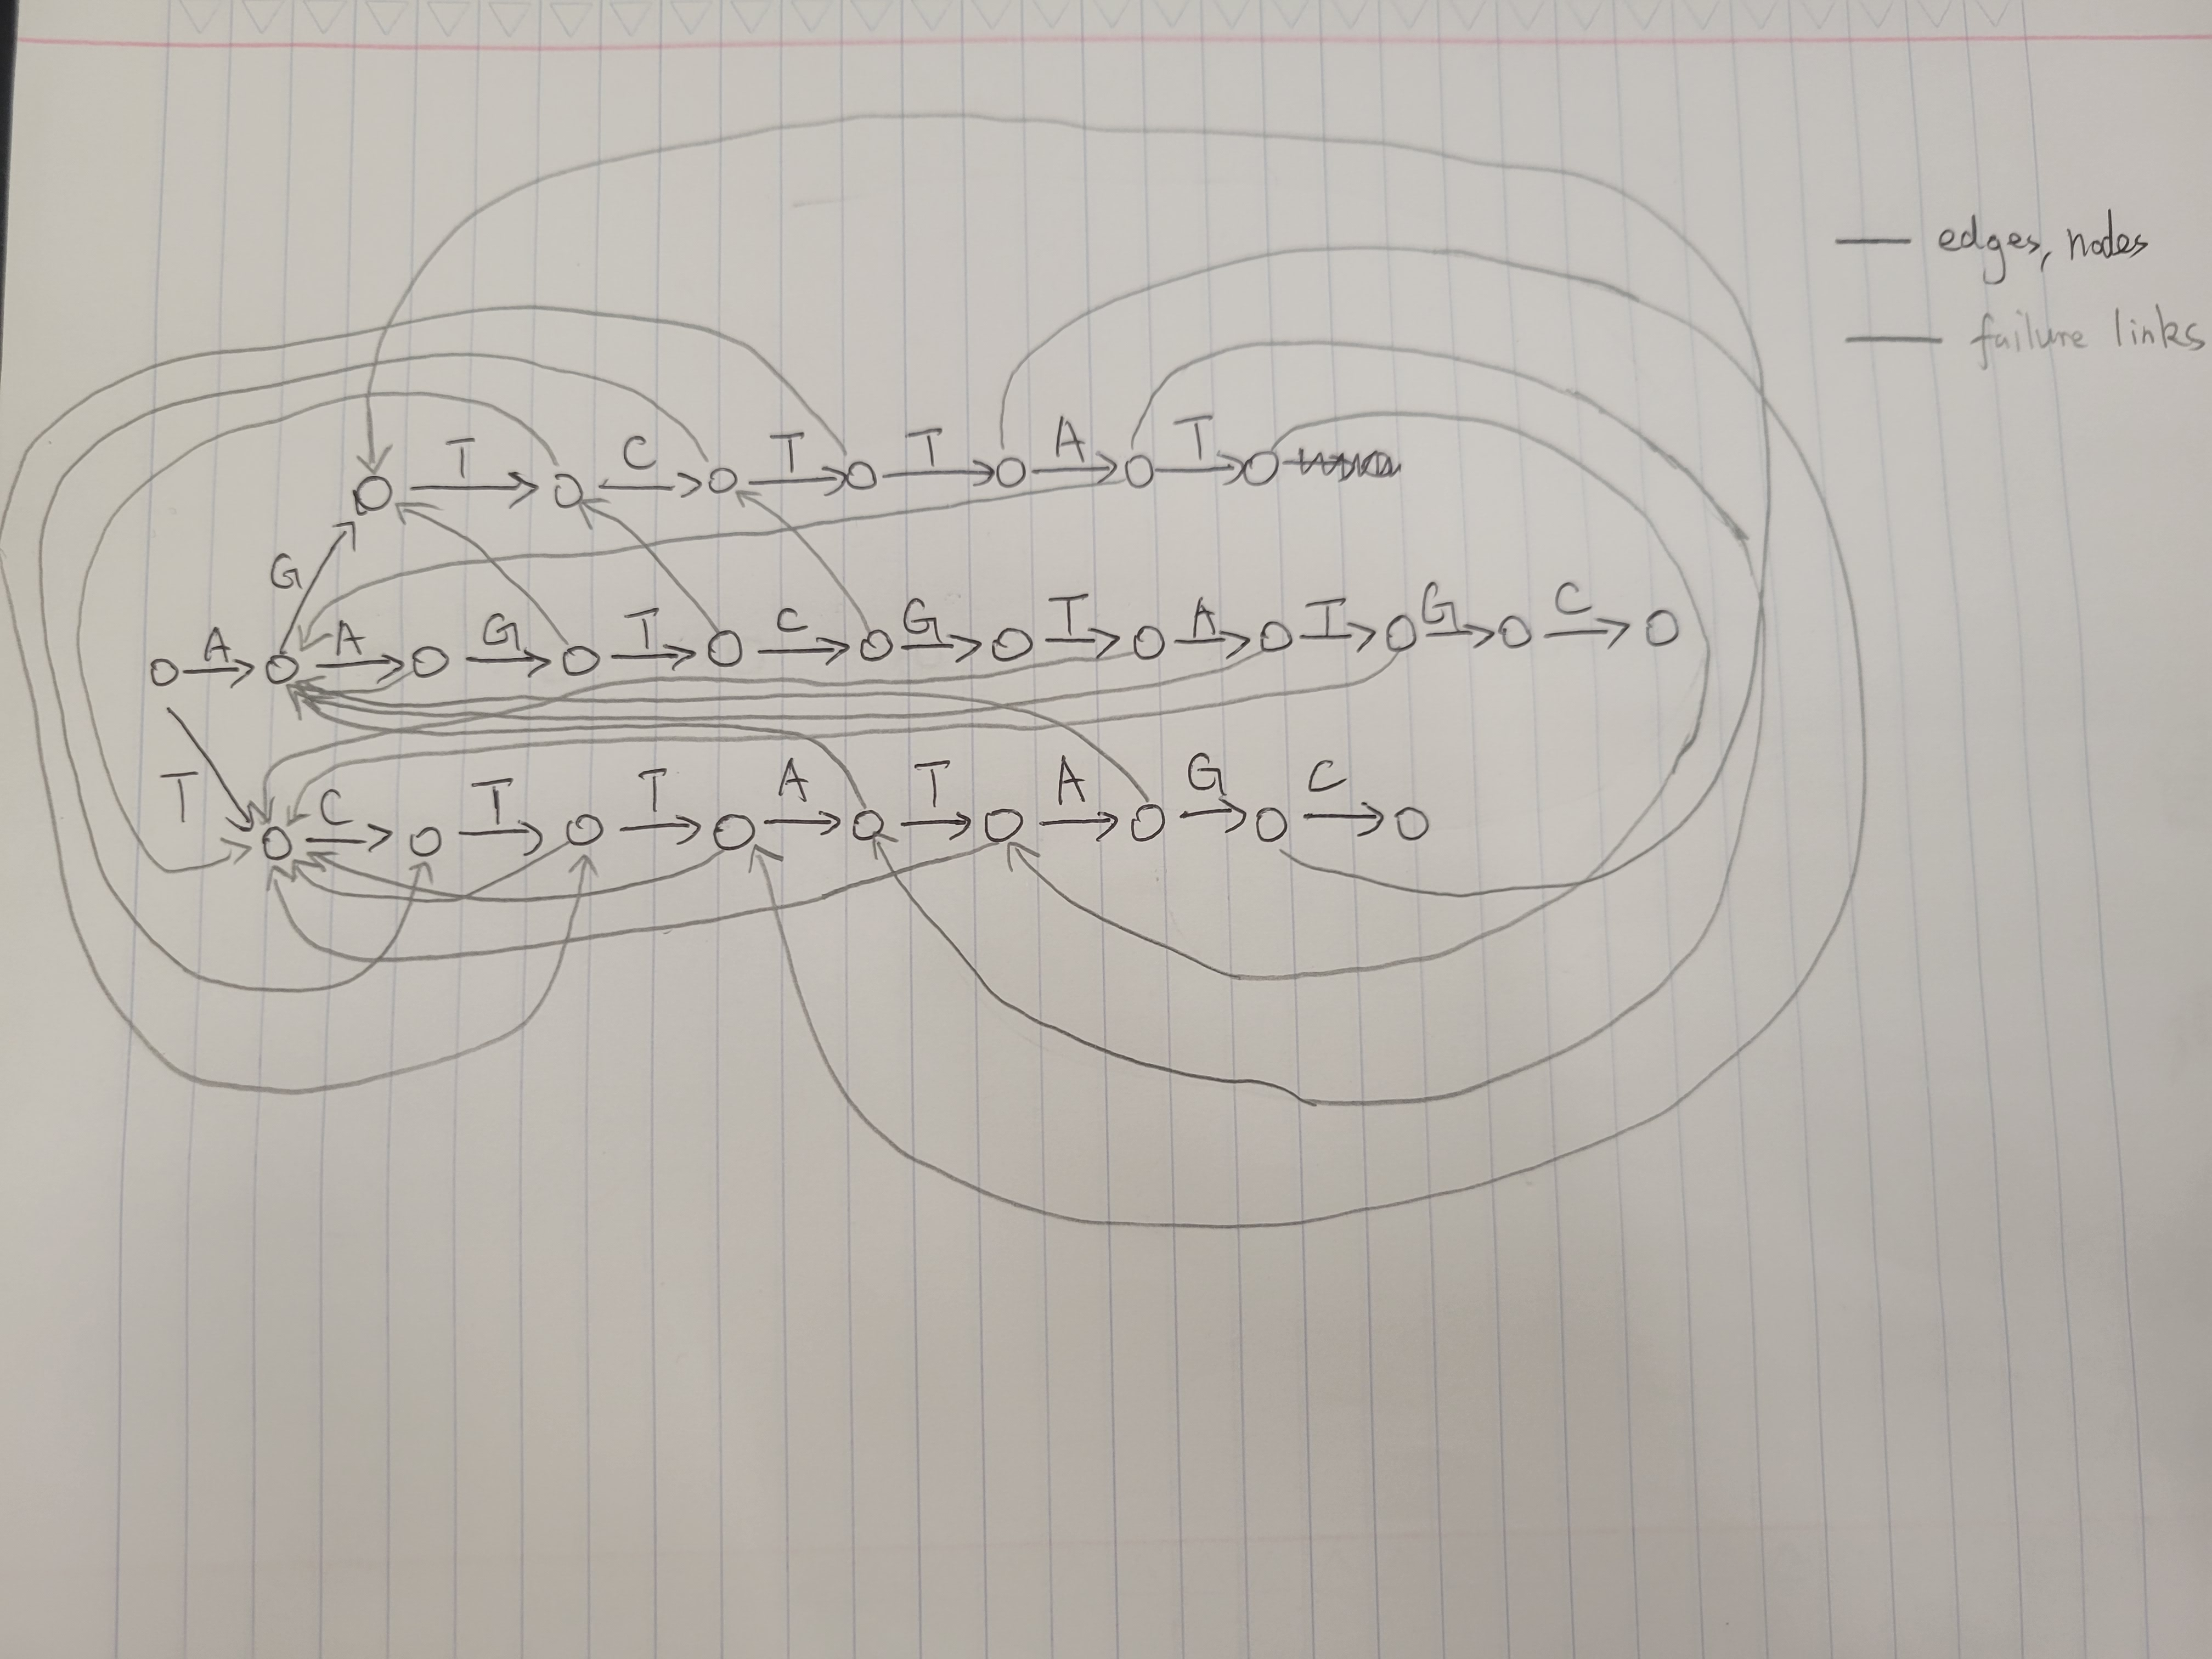

In [3]:
from IPython.display import Image

Image(filename='q3.jpg')

# Q4

In [16]:
#run the algorithm on queries.txt file and get the results into table
!python Aho-Corasick_trie.py queries.txt DNA.txt

Using the formula: $$(n-k-1)(\frac{1}{4})^k$$

We can calculate the expected matches for each query with length k

In [ ]:
!python q4query1.py

In [3]:
import pandas as pd
df = pd.read_csv("queries_output.csv", sep = "\t")
df

,query,matches,length,expected_matches
0,AATAGCTAACA,12,11,3.191276e+00
1,GCCTGGGTGACAGAGTGAGACCCTGTCTC,8,29,4.643911e-11
2,ACCAAACTATAGAAT,1,15,1.246592e-02
3,CTCTTAATATTTATGAAGAAGAACATGGT,1,29,4.643911e-11


In [11]:
#run the algorithm on queries2.txt file and get the results into table
!python Aho-Corasick_trie.py queries2.txt DNA.txt

In [ ]:
!python q4query2.py

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df2 = pd.read_csv("queries2_output.csv", sep = "\t")
df2

,query,matches,length,expected_matches
0,AAGAGAGTGGGGGCCAATATTCAACATTCTTAAAGAAAAGAATTTT...,16,50,1.055901e-23
1,TATTCAACATTCTTAAAGAAAAGAATTTTCAACCCAGAATTTCATA...,13,50,1.055901e-23
2,TGCAGCCATAAAAAAGGATGAGTTCATGTCCTTTGTAGGGACATGG...,13,50,1.055901e-23
3,AATAGCTAACA,12,11,3.191276e+00
4,AGGATGAGTTCATGTCCTTTGTAGGGACATGGATGAAGCTGGAAAC...,9,50,1.055901e-23
5,GCCTGGGTGACAGAGTGAGACCCTGTCTC,8,29,4.643911e-11
6,TATACACCATGGAATACTATGCAGCCATAAAAAAGGATGAGTTCAT...,8,50,1.055901e-23
7,GAAGCTCTACAAGCCAGAAGAGAGTGGGGGCCAATATTCAACATTC...,2,50,1.055901e-23
8,ACCAAACTATAGAAT,1,15,1.246592e-02
9,CTCTTAATATTTATGAAGAAGAACATGGT,1,29,4.643911e-11


E-value counts the expected exact matches for l-mer in the database assuming the nucleotides appear randomly. When its way smaller than 1, we do not expect to see an exact match of the query in the database. For 50 nucleotide long seuqences, the expectation get quite low. Its normal to see 0 matches of the query in the database, which is prevalent in the table above. When we have a expected match of 1, it is normal for us to see 1 actual match for the l-mer. However, we also got l-mers with 1 or more matches with a expected value close to 0. For example there are 16 matches for a 50-mer in 'queries2.txt', the actual matches is way more than the expected matches so this 50-mer is worth noticing.

The discrepancy between expected matches and actual matches could be caused by our assumption when calculating expected matches that the nucleotide distributes in the database randomly(0.25 probability for ATCG). However, we are actually using a part of hg19 as the database to query. The database has biological meaning and is not random. For example, we have a query that serves as promoter for a gene in the region we are querying, its expected match should be 1 or more when taking biology into consideration, but if we only think on a random basis, its expect matches would be close to 0. For another example, Alu elements is known for self reproduction. It has a lot of repeats inside the genome, and the expected matches for these kind of genes should not be considered on a random basis since the actual matches could be way more. In other words, if we see that the actual matches of a query is way higher than their expected matches, it might because their appearance have a biological meaning. 

Specfically for the queries that have much more matches than expected:

queries.txt:

AATAGCTAACA 12

GCCTGGGTGACAGAGTGAGACCCTGTCTC 8

ACCAAACTATAGAAT 1

CTCTTAATATTTATGAAGAAGAACATGGT 1

After BLASTing on all of them, I oberve that these sequences exists in several genes in Chromosome 12, the repeats of them in the region might because that it is short enough and exists in several genes. Also many of the genes they exist in overlap. For example: gene for GRIP1, ANKS1B, TRHDE all has more than one kind of these pieces in them. This also indicates that these genes could be in the region we are looking at.


queries2.txt:

AAGAGAGTGGGGGCCAATATTCAACATTCTTAAAGAAAAGAATTTTCAAC 16

TATTCAACATTCTTAAAGAAAAGAATTTTCAACCCAGAATTTCATATCCA 13

TGCAGCCATAAAAAAGGATGAGTTCATGTCCTTTGTAGGGACATGGATGA 13

AATAGCTAACA 12

AGGATGAGTTCATGTCCTTTGTAGGGACATGGATGAAGCTGGAAACCATC 9

GCCTGGGTGACAGAGTGAGACCCTGTCTC 8

TATACACCATGGAATACTATGCAGCCATAAAAAAGGATGAGTTCATGTCC 8

GAAGCTCTACAAGCCAGAAGAGAGTGGGGGCCAATATTCAACATTCTTAA 2

After BLASTing all of these, I still see some of the familiar genes like GRIP1 and ANKS1B in the results, this further prove the points I made above. Another hypothesis that I have is that some of the queries might be in the pieces like Alu element that are very abundant and have many copies around genome, so we do see many matches for these queries.